<center>

---


<h1>CSCI6612 - Visual Analytics</h1>
<h1>Assignment 3</h1>
</center>

## **QUESTION 1**

In this question, you study the Dash tutorial, and you will experiment with some basic visualization algorithms that you will embed within Dash. You will use the [Gapminder dataset](https://pypi.org/project/gapminder/). Make use of code examples available in the Dash tutorial and Plotly documentation, and clearly reference the URLs of the classes / methods you reused.

**Study** the examples in the [Explore the Gapminder dataset with Plotly Express](https://www.kaggle.com/code/jhossain/explore-the-gapminder-dataset-with-plotly-express).
More example plots on the dataset are available [here](https://www.kaggle.com/code/tklimonova/gapminder-graph-using-python).

The simplified dataset is described [here](https://www.kaggle.com/datasets/tklimonova/gapminder-datacamp-2007), and [here](https://www.kaggle.com/code/tklimonova/gapminder-graph-using-python/input). The full dataset with many more attributes is described [here](https://www.gapminder.org/data/).

The simplified Gapminder dataset consists of rows with the following attributes: *(country, continent, year, life_expectancy, population, GDPperCapita, Iso_alpha, Iso_num)*. It covers the years 1957-2007, and it contains a small subset of the attributes of the full dataset. **In this assignment, you will use the simplified Gapminder dataset.**

Before you start this assignment, review the Dash in 20 minutes [tutorial](https://dash.plotly.com/tutorial). Look up the documentation of the methods and libraries used. A particularly useful library is [Plotly Express](https://plotly.com/python/plotly-express/), which supports the most common plot types, with interactive controls. The [Plotly Express cheat sheet](https://www.datacamp.com/cheat-sheet/plotly-express-cheat-sheet) is useful. Aman has put together a [resource document](https://csci6612.notion.site/VA-Course-TA-Suggestions-3d264e87fb1c4ce48a83dc7af11b7fb8?pvs=4) on [Notion](https://www.notion.so/) that he will keep updating as the course advances. [This code](https://dash.plotly.com/basic-callbacks)  uses the Gapminder dataset. [This code]( https://dash.plotly.com/interactive-graphing) is useful for interaction ideas.   


Using Dash, you will create a dashboard that displays multiple interactive coordinated visualizations of the dataset. Your general exploration objective is to understand whether and how life expectancy correlates with population, GDPperCapita, and continent, over the time period covered by the dataset.
The components of your dashboard will be visualizations selected from the above examples, plus any other visualizations that you consider helpful for the exploration objective stated. Interesting exploration objectives to consider are (1) the evolution of the gap between high, middle and low income countries over time. The gap can be based on life expectancy or GDP per capita. (2) the slope of the linear dependency between life expectancy and GDP per capita over time. (3) how the GDP distribution per capita changes over time. (4) what is the world GDP and world life expectancy over time as a reference level. The world GDP per capita / life expectancy is a weighted average of GDP per capita / life expectancy over the world countries, where the weight is the population of each country. Instead of a focus on continents, you may focus on the income level defined based on GDP per capita in US$ as low-income (0-1000), lower middle income (1000-4000), upper middle income (4000-13500) and high income countries (13500+). In the visualizations that do not explicitly represent GDP per capita you can use different colour for the different income levels. Countries near income level boundaries may switch income levels over time, which can form the basis of an exploration objective.  

Note: There is no single correct answer to this question. The marking criteria include a clear formulation of your specific exploration objectives, demonstration of ability to implement a dashboard with multiple coordinated views and the sophistication of your dashboard. Consider user input, for example selection of attributes of the data to view the respective subsets of the data (e.g. year, country, income level).  

1. Load the simplified Gapminder dataset, and convert the loaded data to a pandas dataframe, as it plays well with Plotly Express.

In [ ]:
!pip install dash plotly

In [1]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Load the Gapminder dataset from Plotly Express
data = px.data.gapminder()

data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


2. Explain your specific exploration objective.

I aim to analyze and visualize global trends in life expectancy, GDP per capita, and population data using the Gapminder dataset. My goal is to create an interactive dashboard that helps users explore the relationships between these variables over time and across different countries and continents.

#### Key Goals:

**Understand Relationships:** I'll be investigating how GDP per capita correlates with life expectancy and how these metrics have evolved over time.

**Interactive Visualizations:** I plan to provide interactive charts and maps so users can filter data by country and see population changes and life expectancy trends.

**Faceted Analysis:** By using facet plots, I can compare trends across different continents and help identify regional patterns in the data.

**World Average Trends:** I’ll display global average trends in GDP per capita and life expectancy to give context for individual countries.

**Animated Visuals:** Animated charts will show changes over time, making it easier to grasp dynamic shifts in the data.

Overall, this exploration aims to shed light on the global disparities in health and economic development, all while providing a user-friendly platform for data exploration.

3. Describe the visualizations included in the dashboard you design for your exploration objective. Justify your choice of visualizations.

I’ve put together a comprehensive dashboard that includes several visualizations to give a clear overview of global health and economic data. Here’s a quick rundown of the visualizations and why they’re useful:

**Scatter Plot (Life Expectancy vs GDP per Capita):** This plot illustrates the relationship between life expectancy and GDP per capita, with an animation feature that shows changes over time. It makes it easy to see how economic factors influence health outcomes and spot trends and correlations.

**Line Chart (World Average GDP per Capita Over Time):** This chart tracks the average GDP per capita worldwide through the years, providing a clear view of global economic trends. It’s essential for understanding the broader economic patterns that contextualize the scatter plot.

**Choropleth Map (Global Life Expectancy Over Time):** This map displays life expectancy across different countries, updating each year. It offers a geographical perspective, highlighting regions with significant health disparities. The color gradients make the variations in life expectancies visually impactful.

**Animated Geographic Map (Countries and Continents Over Time):** This animated map shows the progression of countries and continents over time, providing a spatial view of how different regions have developed. The visual appeal and geographical data trends are easily grasped through this projection.

**Facet Plot (Life Expectancy vs GDP by Continent):** This plot breaks down the relationship between life expectancy and GDP per capita by continent. It allows users to compare patterns within each continent, offering specific regional insights.

**Bar Chart (Population Over Time by Selected Country):** This dynamic bar chart shows population changes for a selected country over time. It’s great for focused analysis, letting users drill down into specific data points and observe trends.

By combining various types of visualizations, this dashboard provides both macro and micro perspectives on health and economic indicators. The interactivity and animation make it engaging while effectively conveying complex data. Users can easily explore trends, identify correlations, and understand the underlying data, making this a holistic tool for analyzing global health and economic data.

4. Explain the user interactions included in your dashboard. Justify your choice of interactions.

#### User Interactions in the Dashboard:

The dashboard includes several user interactions to boost engagement and facilitate data exploration:

**Country Selection Dropdown:** Users can select a specific country from a dropdown menu, allowing them to focus on data relevant to their interests.

**Dynamic Bar Chart Update:** When a country is selected, the bar chart updates in real time to show that country's population over time. This immediate feedback helps users identify trends without needing to refresh the dashboard.

**Hover Information:** Hovering over points in scatter plots reveals additional data, such as GDP and life expectancy values. This contextual data enhances understanding without cluttering the visuals.

**Animation Controls:** The scatter plot and choropleth map include controls for playing and pausing animations. This allows users to dynamically explore changes, making trends easier to observe and understand.

**Facet Plot View:** The facet plot breaks down data by continent, enabling users to compare countries within each region. This helps identify specific regional patterns and outliers.

These interactions make the dashboard dynamic and user-friendly, encouraging exploration of economic and health indicators. By focusing on interactivity, the dashboard caters to diverse user interests and levels of data literacy, enhancing the overall experience and understanding of the data.

In [2]:
app = dash.Dash(__name__)

# Create a scatter plot for Life Expectancy vs GDP per Capita over time
fig1 = px.scatter(
    data, x='gdpPercap', y='lifeExp', color='continent',
    title='Life Expectancy vs GDP per Capita',
    hover_name='country', animation_frame='year',
    range_x=[0, 60000], range_y=[20, 90]
)

# Create a line chart showing world average GDP per capita over time
fig2 = px.line(
    data.groupby(['year']).agg({'gdpPercap': 'mean', 'lifeExp': 'mean'}).reset_index(),
    x='year', y='gdpPercap',
    title='World Average GDP per Capita Over Time'
)

# Create a choropleth world map of life expectancy over time
fig3 = px.choropleth(
    data, locations='iso_alpha', color='lifeExp',
    hover_name='country', animation_frame='year',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Global Life Expectancy Over Time'
)

# Update the layout of the life expectancy map to take full screen
fig3.update_layout(
    autosize=True,
    margin=dict(l=0, r=0, t=40, b=0)
)

# Create an animated geographic map showing countries and continents over time
fig4 = px.line_geo(
    data, locations='iso_alpha', color='continent',
    projection='orthographic',
    title='Countries and Continents Over Time',
    hover_name='country'
)

# Update the layout of the geographic map to take full screen
fig4.update_layout(
    autosize=True,
    margin=dict(l=0, r=0, t=40, b=0)
)

# Create a scatter plot by continent with animation, showing Life Expectancy vs GDP per Capita
fig5 = px.scatter(
    data, x='gdpPercap', y='lifeExp', color='continent', size='pop', size_max=60,
    hover_name='country', facet_col='continent', animation_frame='year',
    title='Life Expectancy vs GDP per Capita by Continent Over Time',
    labels={'gdpPercap': 'GDP per Capita', 'lifeExp': 'Life Expectancy'},
    height=600
)

app.layout = html.Div(
    style={'textAlign': 'center'},
    children=[
        html.H1(children='Gapminder Dashboard', style={'textAlign': 'center'}),

        html.Div(
            style={'width': '50%', 'margin': 'auto'},
            children=[
                html.H2("Country Selection", style={'font-size': '24px', 'font-weight': 'bold', 'margin-bottom': '10px'}),
                dcc.Dropdown(
                    id='country-filter',
                    options=[{'label': country, 'value': country} for country in data['country'].unique()],
                    value='Canada',
                    placeholder='Select a country...',
                    multi=False,
                    style={
                        'font-size': '18px',
                        'padding': '10px',
                        'border-radius': '10px',
                        'border': '2px solid #333',
                        'width': '100%',
                        'background-color': '#f9f9f9'
                    }
                )
            ]
        ),

        # Graph for showing the population bar chart
        html.Div(
            style={'width': '80%', 'margin': 'auto'},
            children=[
                dcc.Graph(id='country-bar-chart')
            ]
        ),
        
        html.Div(
            style={'width': '80%', 'margin': 'auto'},
            children=[
                dcc.Graph(id='life-exp-vs-gdp', figure=fig1),
            ]
        ),

        html.Div(
            style={'width': '80%', 'margin': 'auto'},
            children=[
                dcc.Graph(id='facet-plot', figure=fig5)
            ]
        ),

        html.Div(
            style={'width': '80%', 'margin': 'auto'},
            children=[
                dcc.Graph(id='world-gdp', figure=fig2)
            ]
        ),

        html.Div(
            style={'width': '80%', 'margin': 'auto'},
            children=[
                dcc.Graph(id='geo-animated-map', figure=fig4)
            ]
        ),

        html.Div(
            style={'width': '80%', 'margin': 'auto'},
            children=[
                dcc.Graph(id='life-exp-map', figure=fig3)
            ]
        ),
    ]
)


# Callback to update the bar chart based on selected country
@app.callback(
    Output('country-bar-chart', 'figure'),
    [Input('country-filter', 'value')]
)
def update_bar_chart(selected_country):
    """
    Update the bar chart based on the selected country.
    Filters the data for the selected country and returns a bar chart
    showing the population of the selected country over time.
    """

    country_data = data[data['country'] == selected_country]

    fig = px.bar(
        country_data, x='year', y='pop', color='lifeExp',
        labels={'pop': f'Population of {selected_country}'},
        height=400, template='seaborn',
        title=f'Population of {selected_country} Over Time'
    )

    return fig


if __name__ == '__main__':
    app.run_server(port=8050)


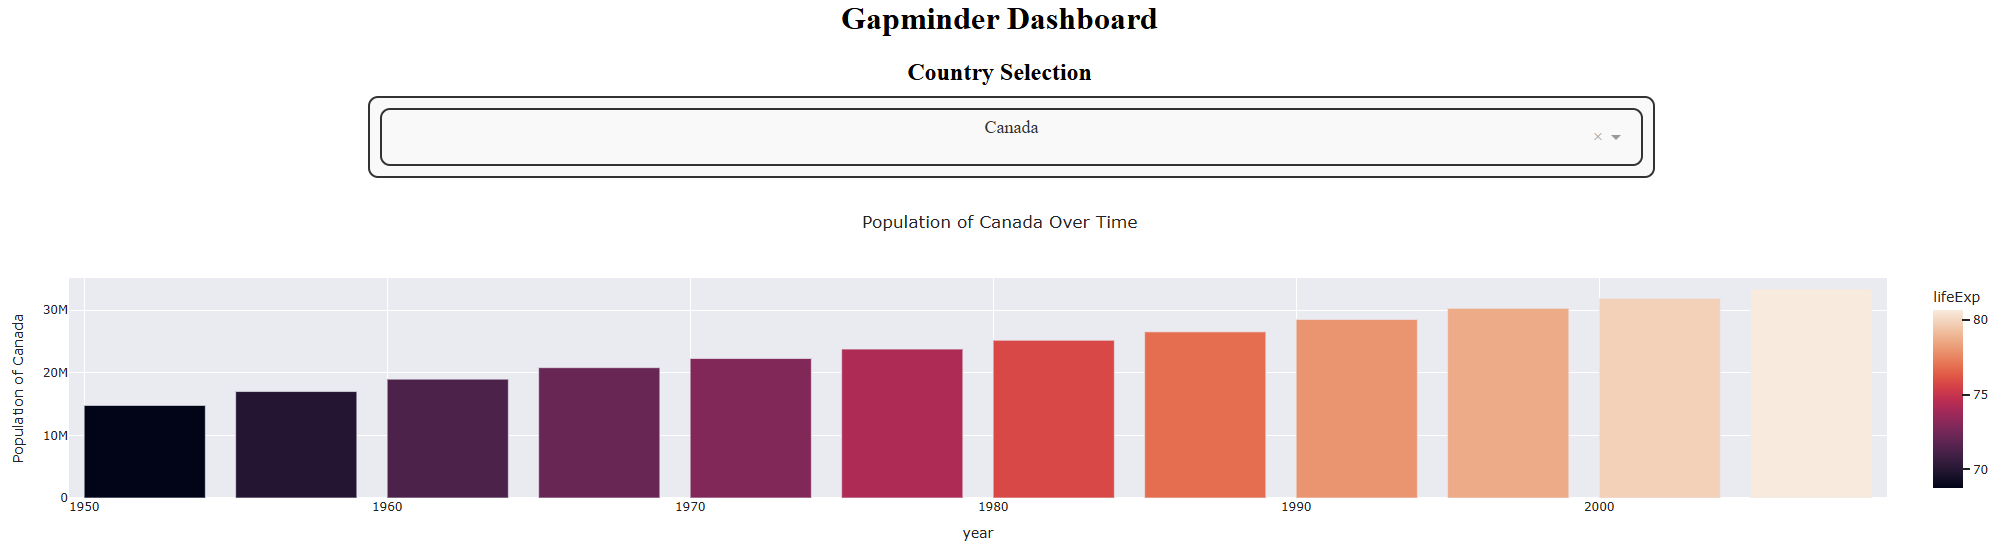

In [3]:
from IPython.display import Image

Image("1.png")

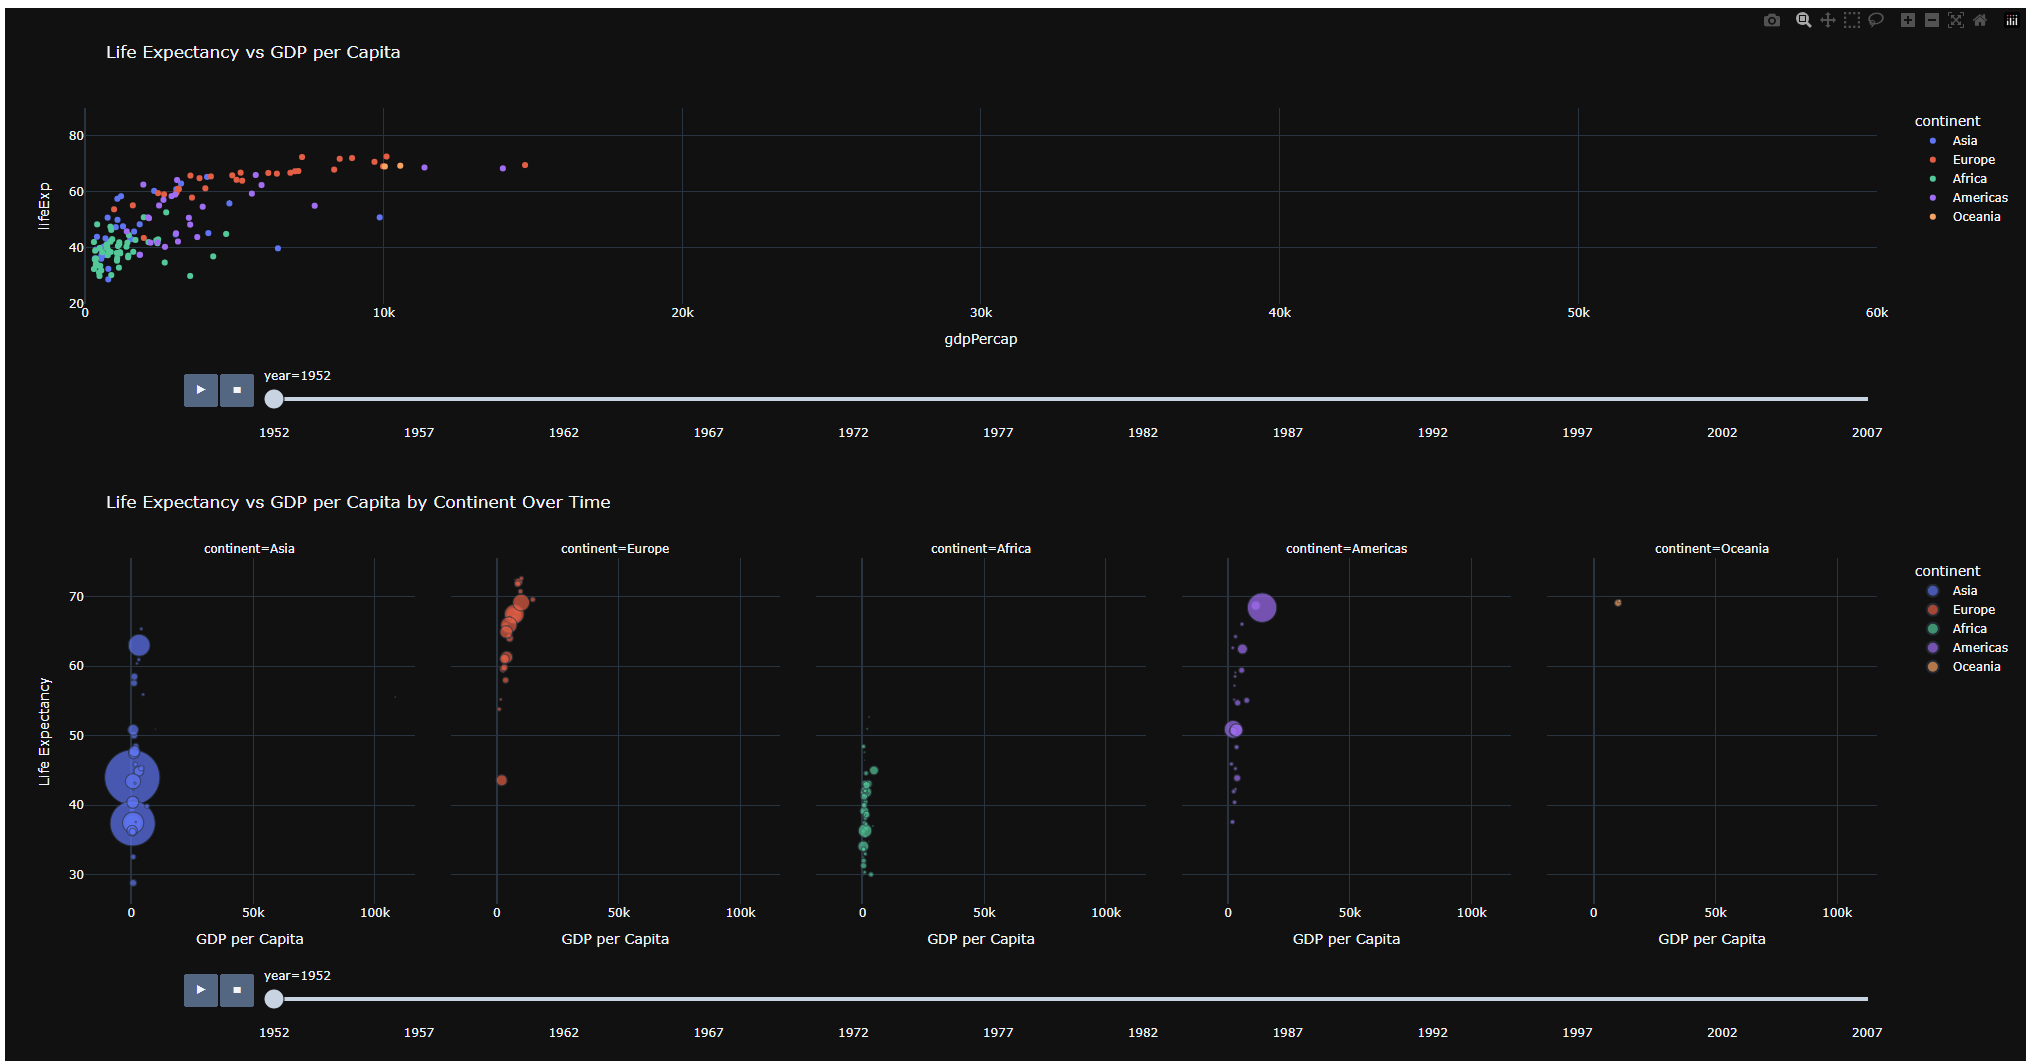

In [4]:
Image("2.png")

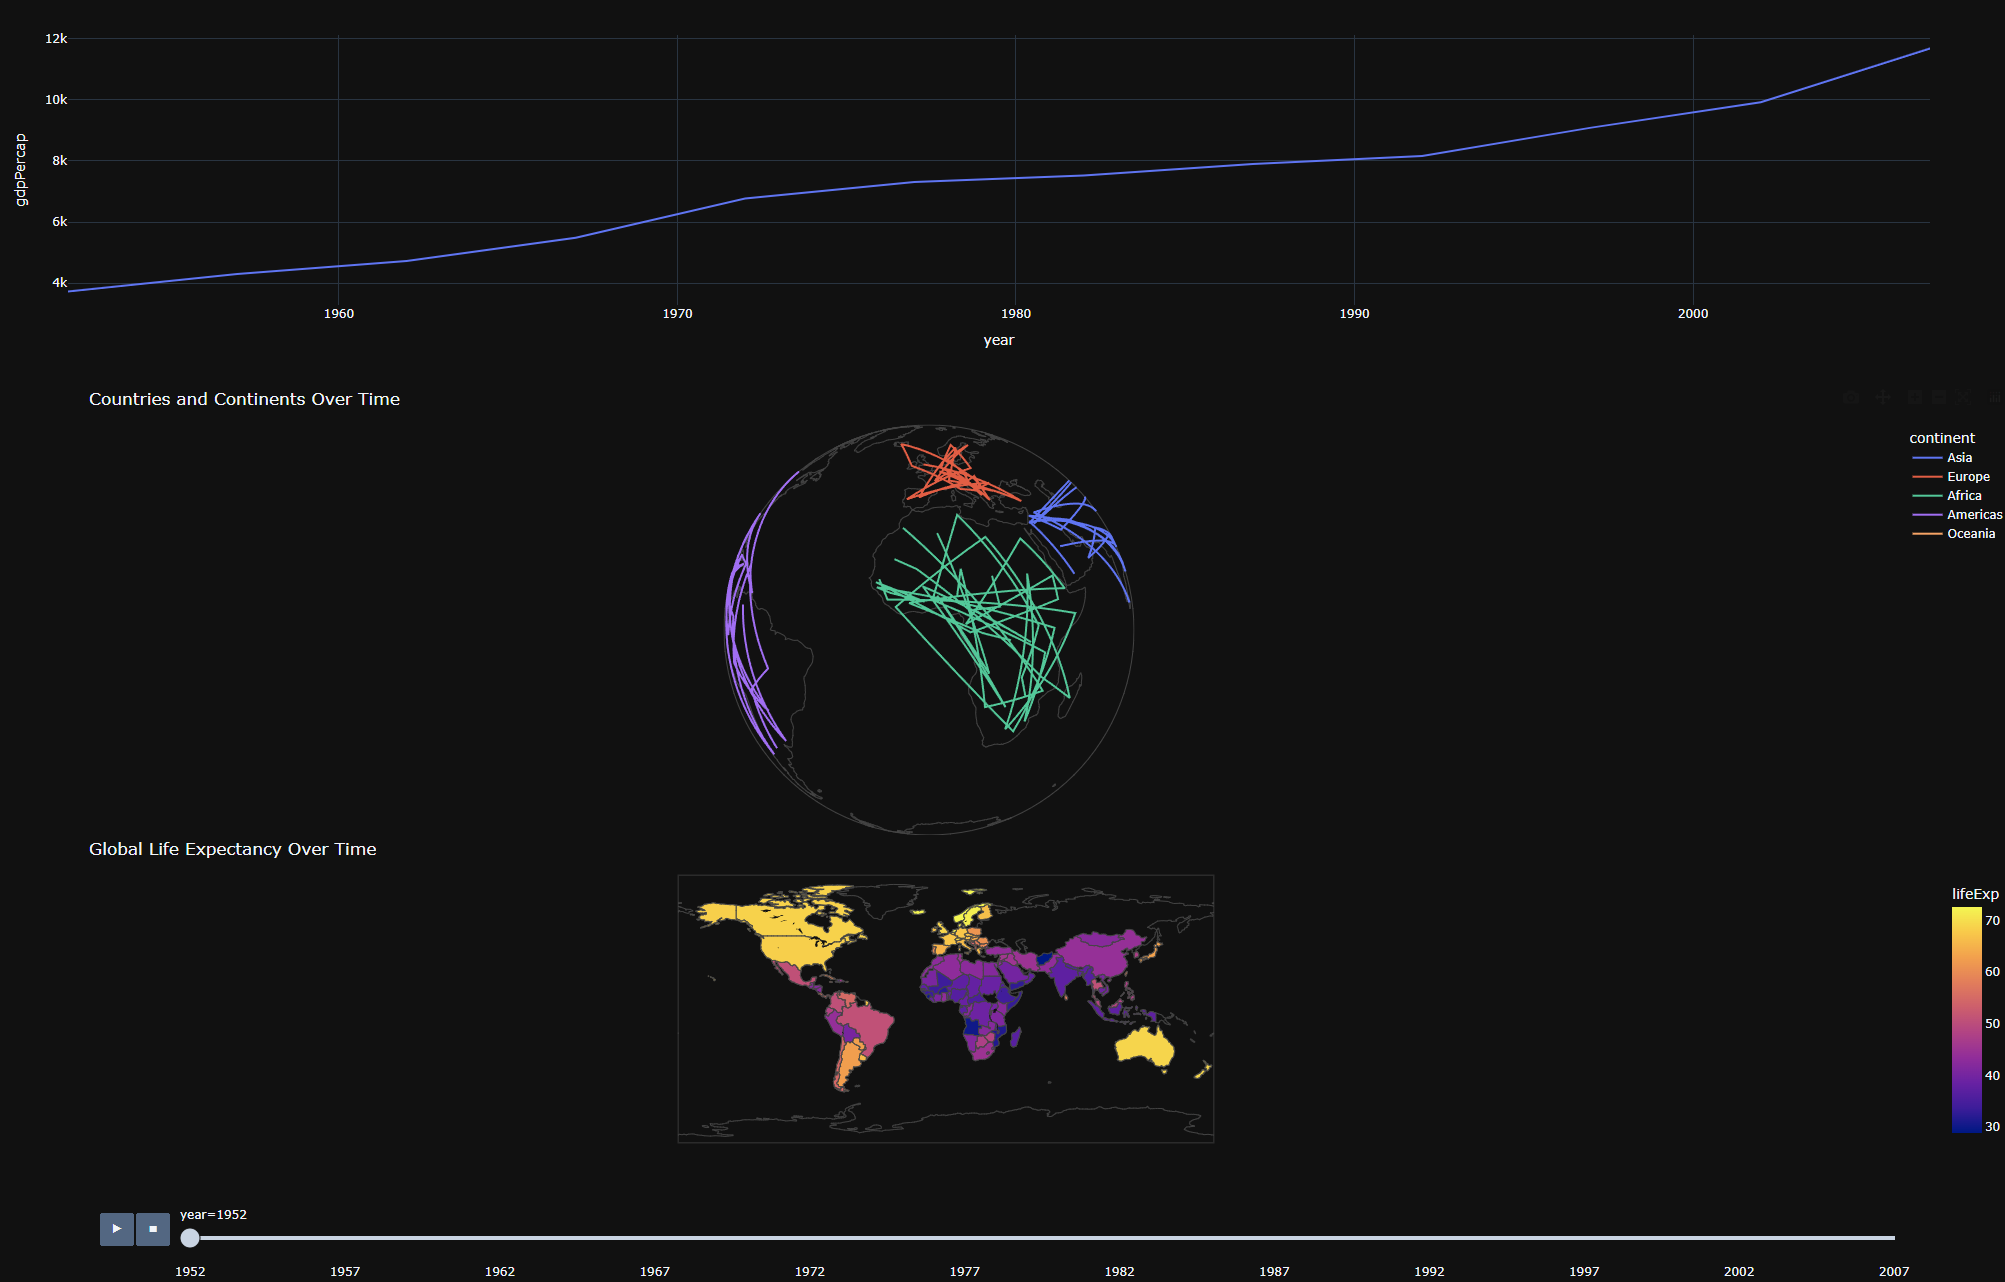

In [5]:
Image("3.png")

5. Create a short video (3-5min) to demo the use of your dashboard for accomplishing your exploration objective. You should upload the mp4 file to your OneDrive folder and share it with Aman and me. You can record the video using the Camera app on windows, or you can record it on Teams by creating a meeting with you as participant, share your demo screen in the meeting and record the demo. Any other way you find to record the demo is acceptable.

Answer: URL: https://tinyurl.com/samshad-csci6612-a3
